In [1]:
# Goal: Plain comparison diagram between nebular spectra against comparison objects
import sys, os
import warnings
warnings.filterwarnings("ignore", module="dynesty.sampling")
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as aconst
import astropy.units as u
from dynesty import plotting as dyplot
from dynesty import utils as dyfunc
import astropy.table as table
from astropy.cosmology import Planck15 as cosmology

try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.const as const
import snelib19odp.specds as specds

In [2]:
sds = specds.load_dataset('SN2019odp')
sds08d = specds.load_dataset('SN2008D')

/home/welterde/.local/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other


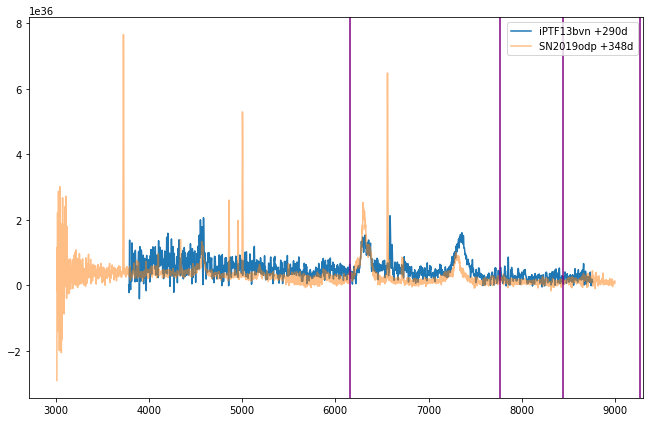

In [3]:
def flux2luminosity(flux, distance):
    # all in cgs units
    return flux * 4 * np.pi * distance**2

plt.figure(figsize=(11,7))
# load the 2015bn comparison spectrum
#s = table.Table.read('../data/comparison/2015bn_2016-05-29_00-00-00_Gemini-N_GMOS_None.txt', format='ascii')
#z15bn = 0.1136
# load the iPTF13bvn nebular spectrum
s = table.Table.read('../data/comparison/iPTF13bvn_2014-04-19_03-36-12_SOAR_Goodman_None.dat', format='ascii')
z = 0.00449
w = s['col1']/(1+z)
dist_cm = cosmology.luminosity_distance(z).to(u.cm).value
l = flux2luminosity(s['col2'], dist_cm)
#idx = np.logical_and(w > 5500, w < 7000)
idx = np.logical_and(w > 3000, w < 9000)
plt.plot(w[idx], l[idx], label='iPTF13bvn +290d')

#if obj == 'keck_early':
#s = sds['ZTF19abqwtfu_20200124_Keck1_v1']
#elif obj == 'keck_late':
s = sds['ZTF19abqwtfu_20200821_Keck1_v1']

idx = np.logical_and(s['restwave'] > 3000, s['restwave'] < 9e3)
#idx = np.logical_and(s['restwave'] > 5500, s['restwave'] < 7000)
#idx = np.logical_and(spec['restwave'] > 6100, spec['restwave'] < 6200)
dist_cm = cosmology.luminosity_distance(const.redshift).to(u.cm).value
l = flux2luminosity(s['flux'][idx], dist_cm)
plt.plot(s['restwave'][idx], l/10, label='SN2019odp +348d', alpha=0.5)

#plt.axvline(4363, color='violet', label='[OIII]')
#plt.axvline(4571, color='cyan', label='Mg I Lines')
#plt.axvline(5180, color='cyan')
plt.axvline(9265, color='purple')
plt.axvline(7771, color='purple')
plt.axvline(6158, color='purple')
plt.axvline(8446, color='purple')
plt.legend()
#plt.savefig('')

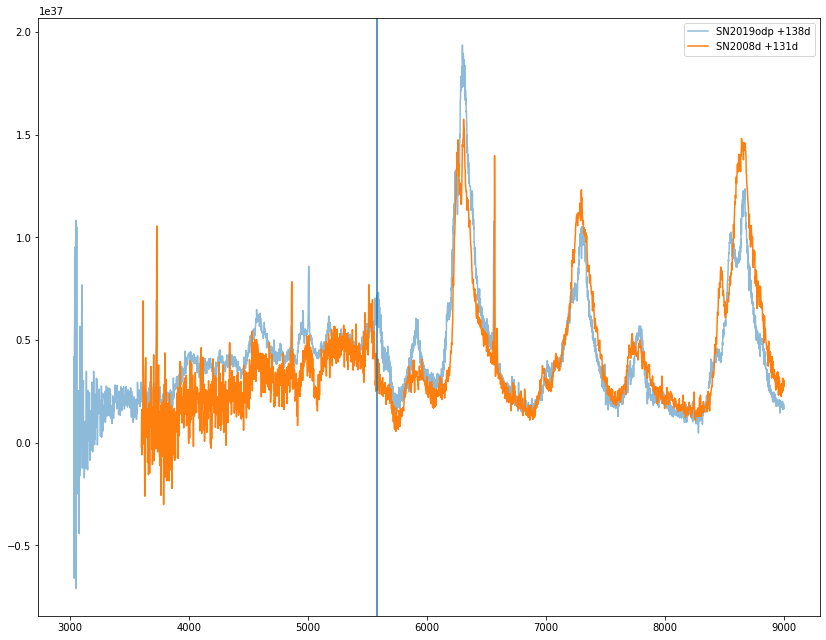

In [4]:
plt.figure(figsize=(14,11))
s = sds['ZTF19abqwtfu_20200124_Keck1_v1']
#elif obj == 'keck_late':
#s = sds['ZTF19abqwtfu_20200821_Keck1_v1']

idx = np.logical_and(s['restwave'] > 3000, s['restwave'] < 9e3)
#idx = np.logical_and(s['restwave'] > 5500, s['restwave'] < 7000)
#idx = np.logical_and(spec['restwave'] > 6100, spec['restwave'] < 6200)
dist_cm = cosmology.luminosity_distance(const.redshift).to(u.cm).value
l = flux2luminosity(s['flux'][idx], dist_cm)
plt.plot(s['restwave'][idx], l/10, label='SN2019odp +%.0fd' % s.meta['phase'], alpha=0.5)

# plot the last SN2008D spectrum
spec_n = sds08d.names[-1]
s = sds08d[spec_n]
z = 0.00649
w = s['restwave']
dist_cm = cosmology.luminosity_distance(z).to(u.cm).value
l = flux2luminosity(s['flux'], dist_cm)
#idx = np.logical_and(w > 5500, w < 7000)
idx = np.logical_and(w > 3600, w < 9000)
plt.plot(w[idx], l[idx], label='SN2008d +%.0fd' % s.meta['phase'])
plt.legend()
plt.axvline(5577)